In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import datasets
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from datetime import datetime 
import time
from sklearn import metrics
from sklearn import preprocessing

# SVM и его ядра
__Суммарное количество баллов: 10__

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [13]:
data = pd.read_csv('blobs2.csv')
data = data.to_numpy()
row = len(data)
X = [0]*row
y = [0]*row
for i in range(row):
    X[i] = data[i][:-1]
    y[i] = int(data[i][-1])
X = np.array(X)

In [14]:
clf1 = SVC(kernel='linear')
clf2 = SVC(kernel='poly', degree=2)
clf3 = SVC(kernel='poly', degree=3)
clf4 = SVC(kernel='poly', degree=5)
clf5 = SVC(kernel='rbf')

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)
clf5.fit(X, y)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

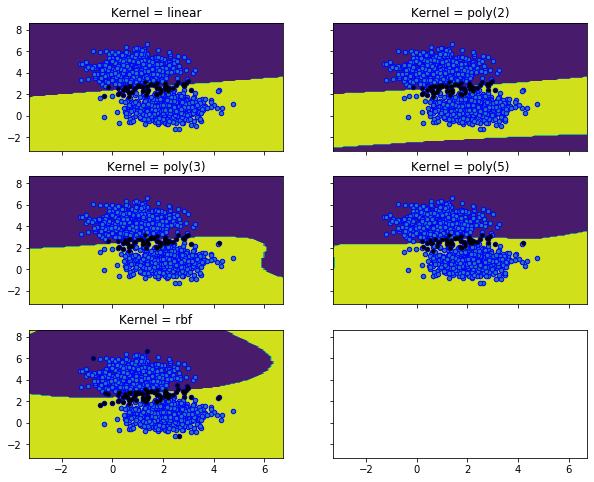

In [23]:
x_min = X[:, 0].min() - 2
x_max = X[:, 0].max() + 2
y_min = X[:, 1].min() - 2
y_max = X[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))
place = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0)]
title = ['Kernel = linear', 'Kernel = poly(2)', 'Kernel = poly(3)', 'Kernel = poly(5)', 'Kernel = rbf']
clf = [clf1, clf2, clf3, clf4, clf5]

for i in range(5):
    Z = clf[i].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[place[i][0], place[i][1]].contourf(xx, yy, Z)
    axarr[place[i][0], place[i][1]].scatter(X[:, 0], X[:, 1], s=20, edgecolor='b')
    axarr[place[i][0], place[i][1]].set_title(title[i])
    vector_x = clf[i].support_vectors_[:, 0]
    vector_y = clf[i].support_vectors_[:, 1]
    axarr[place[i][0], place[i][1]].scatter(vector_x, vector_y, color='k', s=10)

plt.show()

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

In [5]:
data = pd.read_csv('cancer.csv')
data = data.to_numpy()
row = len(data)
X = [0]*row
y = [0]*row
for i in range(row):
    X[i] = data[i][1:]
    if data[i][0] == 'M':
        y[i] = 1
    else:
        y[i] = 0
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

start_time = datetime.now()
clf = CatBoostClassifier(iterations=2)
clf.fit(X_train, y_train, verbose=False)
print("Accuracy:", np.mean(clf.predict(X_val) == y_val))
print(datetime.now() - start_time)

start_time = datetime.now()
clf = SVC()
clf.fit(X_train, y_train)
print("Accuracy:", np.mean(clf.predict(X_val) == y_val))
print(datetime.now() - start_time)

Accuracy: 0.9210526315789473
0:00:00.189262
Accuracy: 0.9122807017543859
0:00:00.023981


In [29]:
data = pd.read_csv('spam.csv')
data = data.to_numpy()
row = len(data)
X = [0]*row
y = [0]*row
for i in range(row):
    X[i] = data[i][:-1]
    y[i] = int(data[i][-1])
X = preprocessing.scale(X)    
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

start_time = datetime.now()
clf = CatBoostClassifier(iterations=6)
clf.fit(X_train, y_train, verbose=False)
print("Accuracy:", metrics.accuracy_score(clf.predict(X), y))
print(datetime.now() - start_time)


Accuracy: 0.9447946098674201
0:00:00.155092


In [28]:
start_time = datetime.now()
clf = SVC()
clf.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(clf.predict(X), y))
print(datetime.now() - start_time)

Accuracy: 0.94457726581178
0:00:00.699894
